In [1]:
import pandas as pd
import numpy as np
import sys
import seaborn as sns
import matplotlib.pyplot as plt
from datetime import datetime
%matplotlib inline

In [2]:
path=sys.path[0]
path

'/home/moebius/Documents/PROJECTS/ethereum-bitcoin-analysis'

In [3]:
df = pd.read_csv("ETH_BTC.csv")

In [4]:
df.head(1)

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,1500000000,0.086593,0.086242,0.086496,0.086364,49.756855,575.645091,0.086437


### Date formatting

In [5]:
df['date'].head()

0    1500000000
1    1500000300
2    1500000600
3    1500000900
4    1500001200
Name: date, dtype: int64

In [6]:
df2 = df.copy()

In [7]:
dates = pd.Series(df['date'])
df2['date'] = pd.to_datetime(dates,unit='s')
df2['date'].head()

0   2017-07-14 02:40:00
1   2017-07-14 02:45:00
2   2017-07-14 02:50:00
3   2017-07-14 02:55:00
4   2017-07-14 03:00:00
Name: date, dtype: datetime64[ns]

### Exploratory analysis

In [8]:
cols =[col for col in df2.columns]
cols

['date',
 'high',
 'low',
 'open',
 'close',
 'volume',
 'quoteVolume',
 'weightedAverage']

In [9]:
df2.describe()

,high,low,open,close,volume,quoteVolume,weightedAverage
count,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000,7673.000000
mean,0.081263,0.080825,0.081049,0.081048,95.603058,1151.074874,0.081043
std,0.006316,0.006199,0.006256,0.006255,148.679217,1685.798481,0.006256
min,0.066500,0.066120,0.066340,0.066360,0.000000,0.000000,0.066389
25%,0.078591,0.078218,0.078400,0.078400,23.201172,291.656045,0.078401
50%,0.081139,0.080807,0.080980,0.080973,48.594397,609.208737,0.080976
75%,0.084000,0.083500,0.083829,0.083828,110.648419,1355.436415,0.083802
max,0.111500,0.105704,0.109314,0.109202,3490.944901,31770.501508,0.109880


(array([17360., 17364., 17368., 17372., 17376., 17379., 17383., 17387.]),
 [Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, ''),
  Text(0, 0, '')])

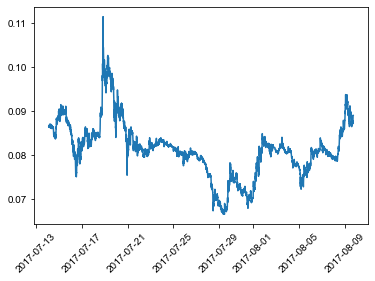

In [10]:
plt.plot(df2["date"],df2["high"])
sns.set(font_scale=.5, style="whitegrid") # set plotting style
plt.xticks(rotation=45)

In [11]:
df3 = df2.drop(['quoteVolume','volume'], axis=1)

In [12]:
sns.set_style("darkgrid")

In [13]:
def plot_lines(dataframe):
    sns.set(rc={'figure.figsize':(14.7,10.27)})
    sns.lineplot(data=dataframe[:200])

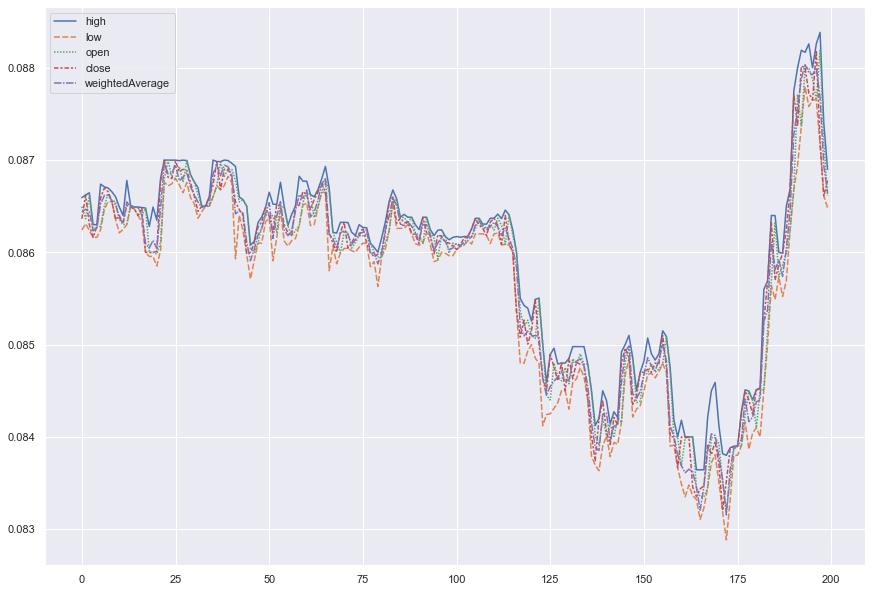

In [14]:
plot_lines(df3[:200])

# LINEAR MODEL

In [15]:
from sklearn.linear_model import LinearRegression

In [16]:
start_buffer = 150
train_buffer = 100 
period_analysis = 150
open_trade = False

# REGRESSION MODEL
for i in range(len(df2.values[start_buffer:])):
    X_train = np.array(df.index[i:i+period_analysis-train_buffer]).reshape(-1, 1)
    y_train = np.array(df['close'][i:i+period_analysis-train_buffer]).reshape(-1, 1)

    X_test = np.array(df.index[i+train_buffer:i+period_analysis]).reshape(-1, 1)
    y_test = np.array(df['close'][i+train_buffer:i+period_analysis]).reshape(-1, 1)

    model = LinearRegression()
    model.fit(X_train, y_train)
    reg = model.score(X_test, y_test)
    if reg > 0.5:
        print(df2['date'].iloc[i], 'regression score ',round(reg,3), ' on previous ',period_analysis,' data points')

2017-07-15 11:40:00 regression score  0.779  on previous  150  data points
2017-07-15 14:55:00 regression score  0.707  on previous  150  data points
2017-07-15 23:45:00 regression score  0.521  on previous  150  data points
2017-07-15 23:50:00 regression score  0.528  on previous  150  data points
2017-07-15 23:55:00 regression score  0.505  on previous  150  data points
2017-07-16 00:20:00 regression score  0.508  on previous  150  data points
2017-07-16 00:25:00 regression score  0.532  on previous  150  data points
2017-07-16 00:30:00 regression score  0.541  on previous  150  data points
2017-07-16 00:35:00 regression score  0.516  on previous  150  data points
2017-07-16 18:50:00 regression score  0.531  on previous  150  data points
2017-07-24 17:15:00 regression score  0.552  on previous  150  data points
2017-07-24 17:20:00 regression score  0.569  on previous  150  data points
2017-07-24 17:25:00 regression score  0.517  on previous  150  data points
2017-07-24 17:30:00 regre

In [17]:
df2.head(1)

,date,high,low,open,close,volume,quoteVolume,weightedAverage
0,2017-07-14 02:40:00,0.086593,0.086242,0.086496,0.086364,49.756855,575.645091,0.086437


In [18]:
df3 = df2.drop(['quoteVolume','volume'], axis=1)

In [19]:
sns.set_style("darkgrid")

In [20]:
def plot_lines(dataframe):
    sns.set(rc={'figure.figsize':(14.7,10.27)})
    sns.lineplot(data=dataframe[:200])

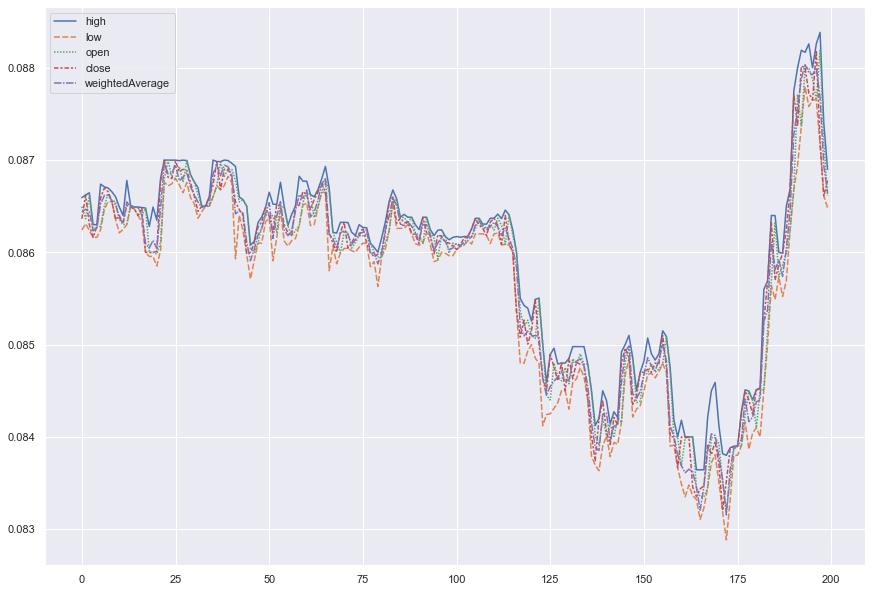

In [21]:
plot_lines(df3[:200])